<a href="https://colab.research.google.com/github/raphmelgom/Previsao-Preco-do-abacate-com-ML/blob/main/Pre%C3%A7o_do_Abacate_MLR_RNA_SVM_DCT_XGB_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
A tabela abaixo representa os dados semanais do volume nacional de varejo (unidades) e preço de venda ao consumidor. Os dados de varejo são coletados diretamente dos caixas registradores dos varejistas com base nas vendas reais de abacates Hass. A tabela reflete um conjunto expandido de dados de varejo, incluindo várias fontes de venda: mercearias, lojas de desconto, clubes de compras, farmácias, lojas de dólar e militares. O preço médio (dos abacates) na tabela reflete o custo por unidade (por abacate), mesmo quando várias unidades (abacates) são vendidas em sacos. Os códigos de busca de produto (PLU's) na tabela são exclusivamente para abacates Hass. Outras variedades de abacates (por exemplo, greenskins) não estão incluídas nesta tabela.

Colunas do dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold'''

#Contexto
É um fato bem conhecido que os Millennials AMAM torradas de abacate. Também é um fato bem conhecido que todos os Millennials vivem no porão de seus pais.

Claramente, eles não estão comprando uma casa porque estão gastando muito dinheiro em torradas de abacate!

Mas talvez haja esperança... se um Millennial pudesse encontrar uma cidade com abacates baratos, poderia viver o sonho americano dos Millennials.

1.	Importando as bibliotecas
2.	Importando o Dataset
3.	Pré-processamento
*	Analisando o preço médio
* Gráfico de fatores
* Cuidando dos Outliers
* Variáveis Categóricas
4.	Ajuste do Modelo (Model Fitting)
5.	Multiple Linear Regression 
6.	Random Forest Regression 
7.	XGBoost 
8.	Decision Tree Regression 
9.	SVM (Support Vector Machine) 
10.	RNA (Rede Neural Artificial) 
11.	Avaliação Final do Modelo




#1. Importando as bibliotecas

In [49]:
# importar as bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import percentile

#Modelos
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", message="Pass the following variables as keyword args: x, y.")
from tensorflow import keras
from math import sqrt
import matplotlib.pyplot as plt

#2. Importando o Dataset

Dataset download: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Avocado Prices; Historical data on avocado prices and sales volume in multiple US markets


In [50]:
# Instalando a biblioteca gdown
!pip install gdown

# Use o link compartilhado para baixar o arquivo para o diretório atual do Colab
!gdown --id 1NpBwv1p0jjySDvTK83cAwJjYb6cSna6v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NpBwv1p0jjySDvTK83cAwJjYb6cSna6v
To: /content/avocado.csv
100% 1.99M/1.99M [00:00<00:00, 98.9MB/s]


In [51]:
# Ler o arquivo CSV com pandas
abacate = pd.read_csv('avocado.csv')
abacate.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [52]:
abacate.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [53]:
abacate.drop('Unnamed: 0',axis=1,inplace=True)
abacate.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [54]:
abacate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [55]:
#converte a coluna Date em um objeto do tipo datetime
abacate['Date']=pd.to_datetime(abacate['Date'])

#cria uma nova coluna chamada Month no conjunto de dados
abacate['Month']=abacate['Date'].apply(lambda x:x.month)

#cria uma nova coluna chamada Day no conjunto de dados
abacate['Day']=abacate['Date'].apply(lambda x:x.day)
abacate.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#3. Pré-processamento
##3.1 Analisando o preço médio





Text(0.5, 1.0, 'Average Price')

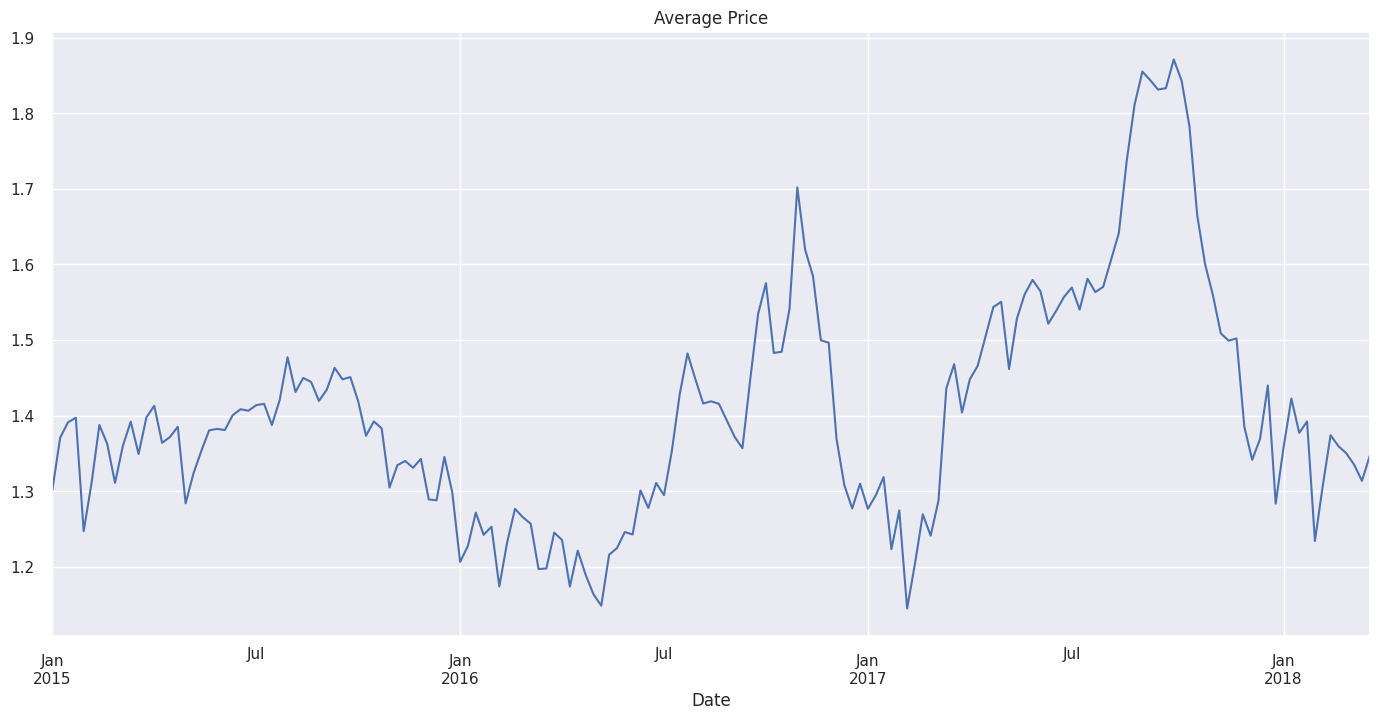

In [56]:
#O gráfico mostra o preço médio do abacate em vários pontos do tempo
byDate=abacate.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

'O preço sobe por um tempo em fevereiro a março, depois cai em abril e, em seguida, o mês de maio testemunha um aumento no preço médio. \nEsta subida atinge o seu auge no mês de outubro e daí por diante começa a cair'

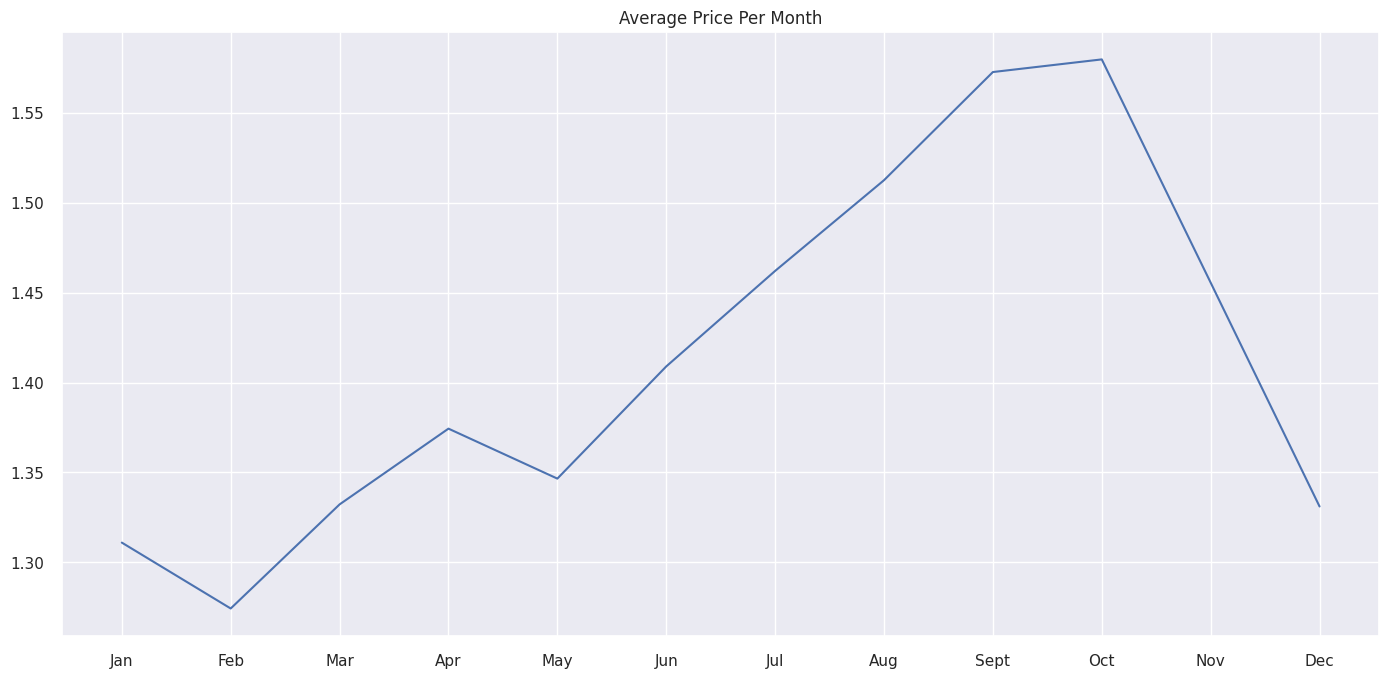

In [57]:
byMonth = abacate.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

'''O preço sobe por um tempo em fevereiro a março, depois cai em abril e, em seguida, o mês de maio testemunha um aumento no preço médio. 
Esta subida atinge o seu auge no mês de outubro e daí por diante começa a cair'''

'Para o preço médio por dia, observa-se que flutua de maneira semelhante em um intervalo regular.'

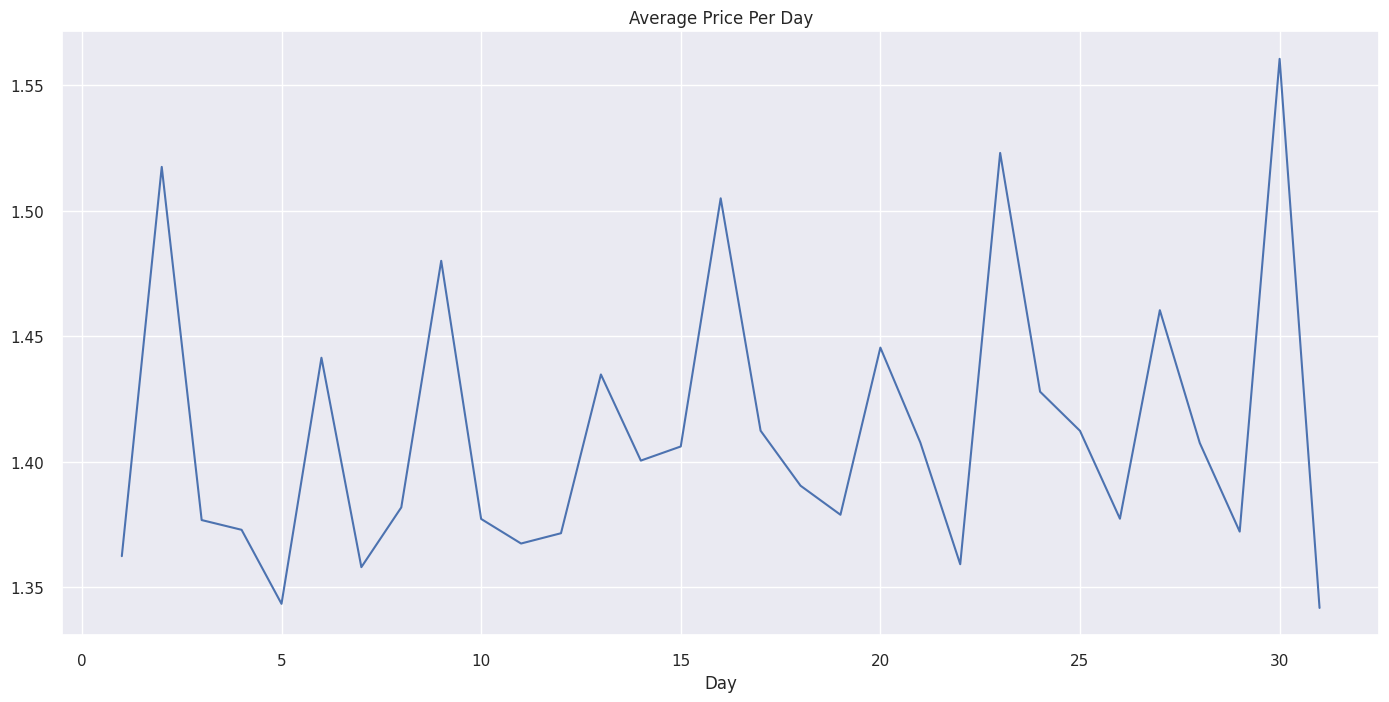

In [58]:
byDay = abacate.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

'''Para o preço médio por dia, observa-se que flutua de maneira semelhante em um intervalo regular.'''

'O barplot mostra o preço médio do abacate em várias regiões. Hartford Springfield, San Francisco, New York são as regiões com os preços mais altos de abacate.\nLogo, se você gosta de abacate evite morar nessas regiões, caso contrário terá prejuízo hehehehe'

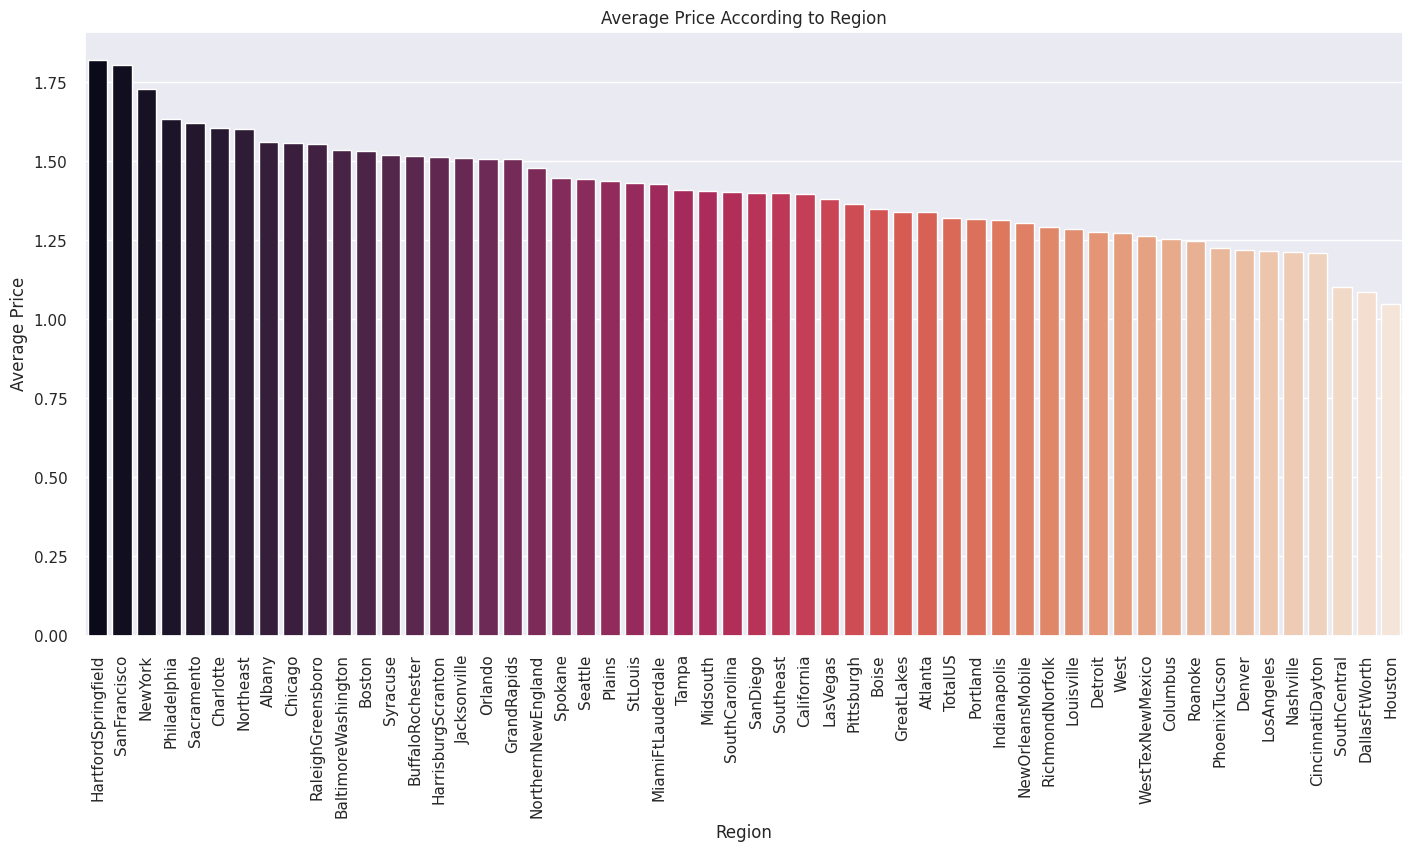

In [59]:
byRegion=abacate.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

'''O barplot mostra o preço médio do abacate em várias regiões. Hartford Springfield, San Francisco, New York são as regiões com os preços mais altos de abacate.
Logo, se você gosta de abacate evite morar nessas regiões, caso contrário terá prejuízo hehehehe'''

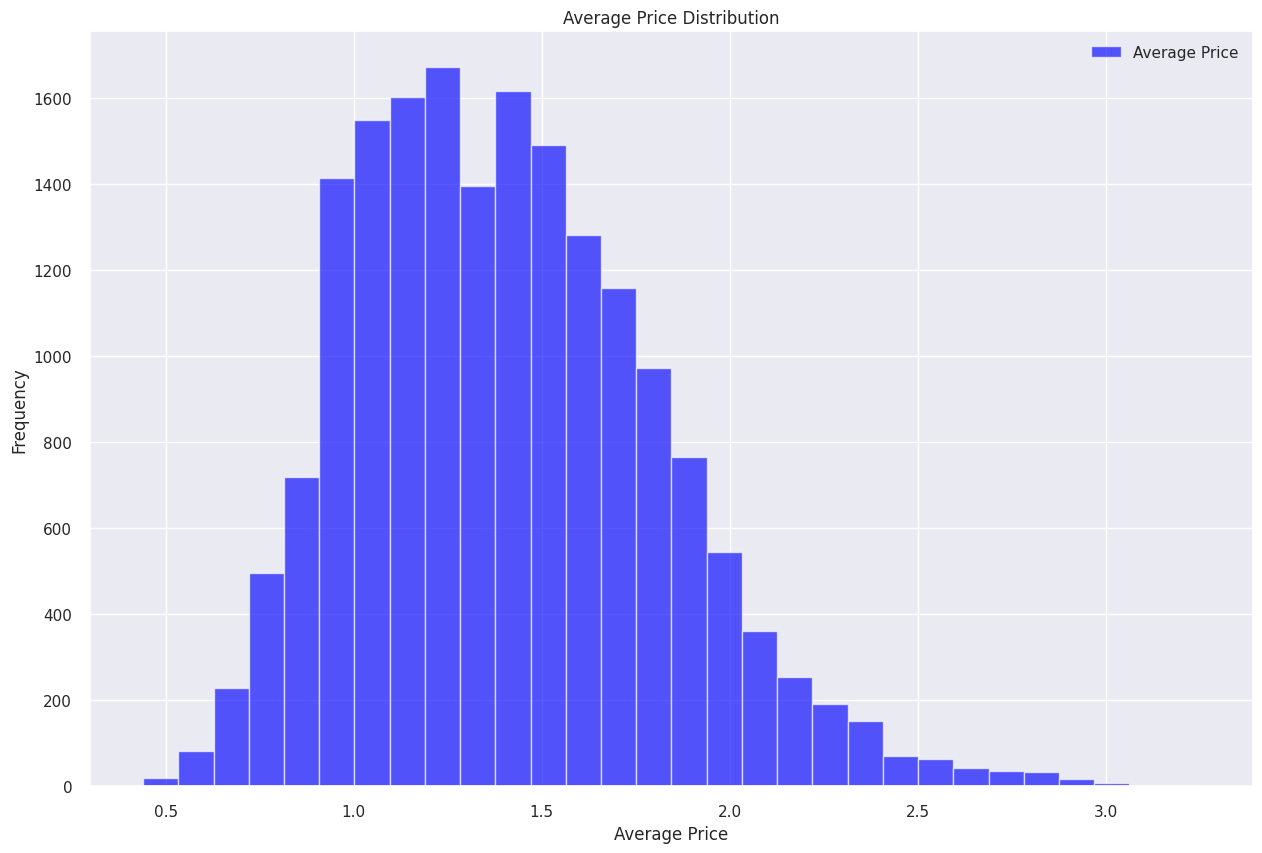

'O histograma acima para o preço médio do abacate sugere que sua distribuição é um tanto positivamente enviesada.'

In [60]:
plt.figure(figsize=(15,10),dpi=100)
abacate["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

'''O histograma abaixo para o preço médio do abacate sugere que sua distribuição é um tanto positivamente enviesada.'''

'No Heatmap, os Recursos não tem correlação com a coluna do Preço Médio, no entanto, a maioria deles está correlacionada entre si.'

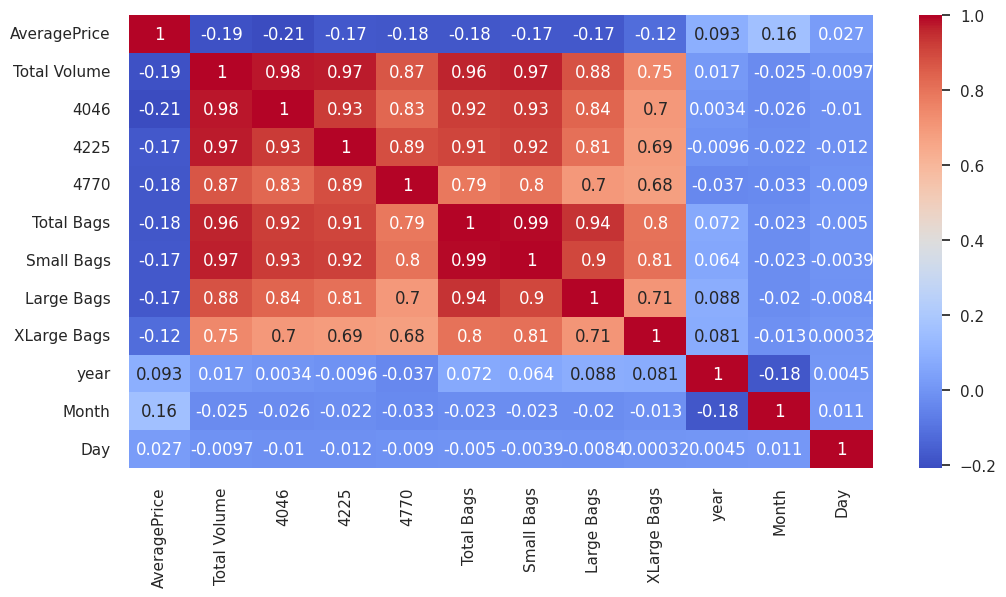

In [61]:
corr_df = abacate.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

'''No Heatmap, os Recursos não tem correlação com a coluna do Preço Médio, no entanto, a maioria deles está correlacionada entre si.'''


##3.2 Gráfico de fatores
Essa próxima linha de código está criando um gráfico de fatores usando a biblioteca Seaborn. Especificamente, o gráfico de fatores está sendo usado para visualizar a relação entre as variáveis "AveragePrice", "region" e "year" no conjunto de dados "abacate".

Os argumentos passados para a função sns.factorplot() são:

1.   AveragePrice': o nome da variável que será exibida no eixo x do gráfico.
2.   'region': o nome da variável que será usada para agrupar os dados no eixo y do gráfico.
1.   data=abacate: o conjunto de dados que contém as variáveis a serem plotadas.
2.   hue='year': a variável que será usada para criar diferentes cores no gráfico, uma para cada valor distinto da variável "year".
1.   aspect=0.8: a relação de aspecto do gráfico.
2.   height=15: a altura do gráfico em polegadas.
1.   palette='magma': o mapa de cores que será usado para as diferentes cores no gráfico.
2.   join=False: se os pontos no gráfico devem ser conectados por linhas.

O resultado é um gráfico de fatores que mostra a distribuição de "AveragePrice" em relação às diferentes regiões (cada região é representada em uma linha do gráfico) e anos (cada ano é representado por uma cor diferente). O gráfico pode ser usado para visualizar padrões e tendências nos dados, e pode ser uma ferramenta útil para explorar a relação entre múltiplas variáveis em um conjunto de dados.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


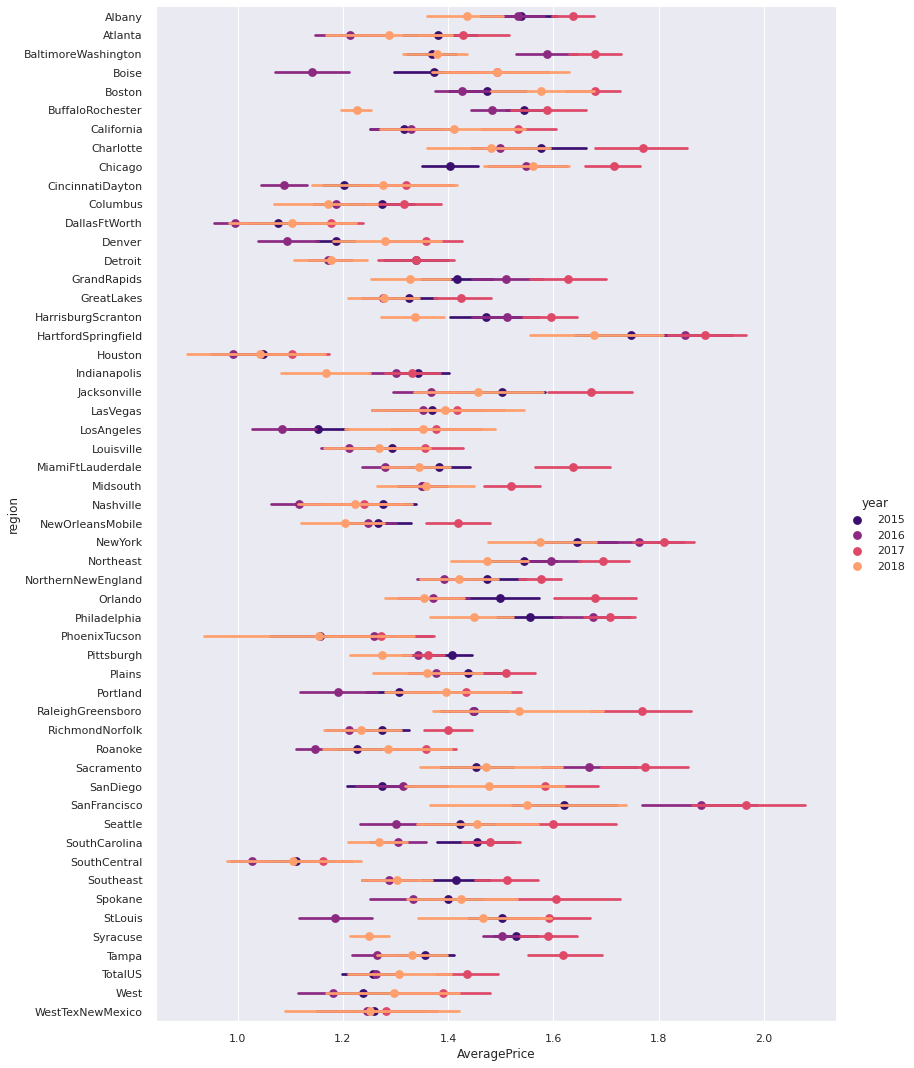

In [62]:
sns.factorplot('AveragePrice','region',data=abacate,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )


##3.3 Cuidando dos Outliers

'O boxplot indica que todas as variáveis contêm outliers.'

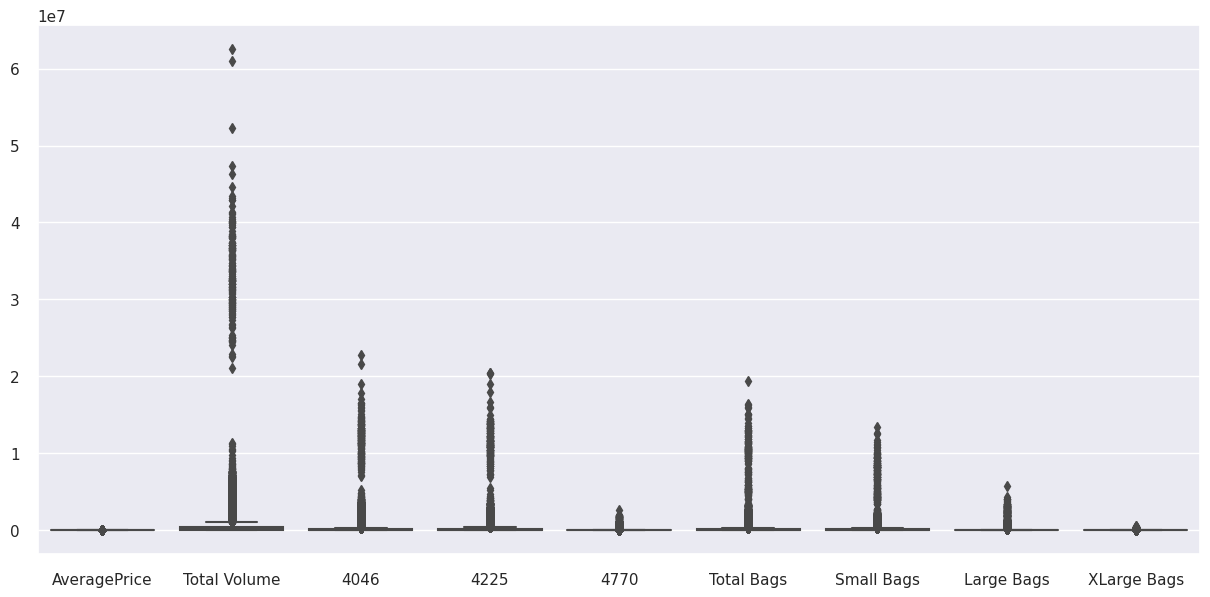

In [63]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = abacate[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

'''O boxplot indica que todas as variáveis contêm outliers.'''

In [64]:
#Removendo a coluna "Date" que não faz sentido manter
abacate.drop(columns=["Date"],inplace=True)
abacate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [65]:
columns = abacate.columns
for j in columns:
    if isinstance(abacate[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(abacate[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        abacate[j] = abacate[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

'''Em resumo no trecho de código, foram substituídos os valores discrepantes (outliers) acima do limite superior (upper whisker)
pelo valor do limite superior e os valores discrepantes abaixo do limite inferior (lower whisker) pelo valor do limite inferior.'''

'Em resumo no trecho de código, foram substituídos os valores discrepantes (outliers) acima do limite superior (upper whisker)\npelo valor do limite superior e os valores discrepantes abaixo do limite inferior (lower whisker) pelo valor do limite inferior.'

Na linha de código acima, está sendo realizado um tratamento de outliers no conjunto de dados, usando as bibliotecas numpy e percentile.

Em seguida, o loop for percorre todas as colunas do conjunto de dados. A verificação isinstance(abacate[j][0], str) é usada para ignorar as colunas que contêm valores de string.

Para as colunas numéricas, é feito o seguinte procedimento para identificar e tratar os outliers:

São calculados os quartis (25% e 75%) para a coluna atual usando a função percentile().
Com base nos quartis, é calculado o limite inferior (lower_fence) e o limite superior (upper_fence) para a coluna, usando a fórmula do intervalo interquartil: lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0])) e upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0])).

Qualquer valor na coluna que estiver acima do upper_fence ou abaixo do lower_fence é substituído por upper_fence ou lower_fence, respectivamente, usando a função apply() da biblioteca pandas.
Dessa forma, essa linha de código está sendo usada para tratar outliers em colunas numéricas do conjunto de dados, substituindo valores que estão fora do intervalo interquartil por valores no limite do intervalo. Isso ajuda a remover valores discrepantes que podem afetar negativamente o desempenho de alguns algoritmos de aprendizado de máquina.

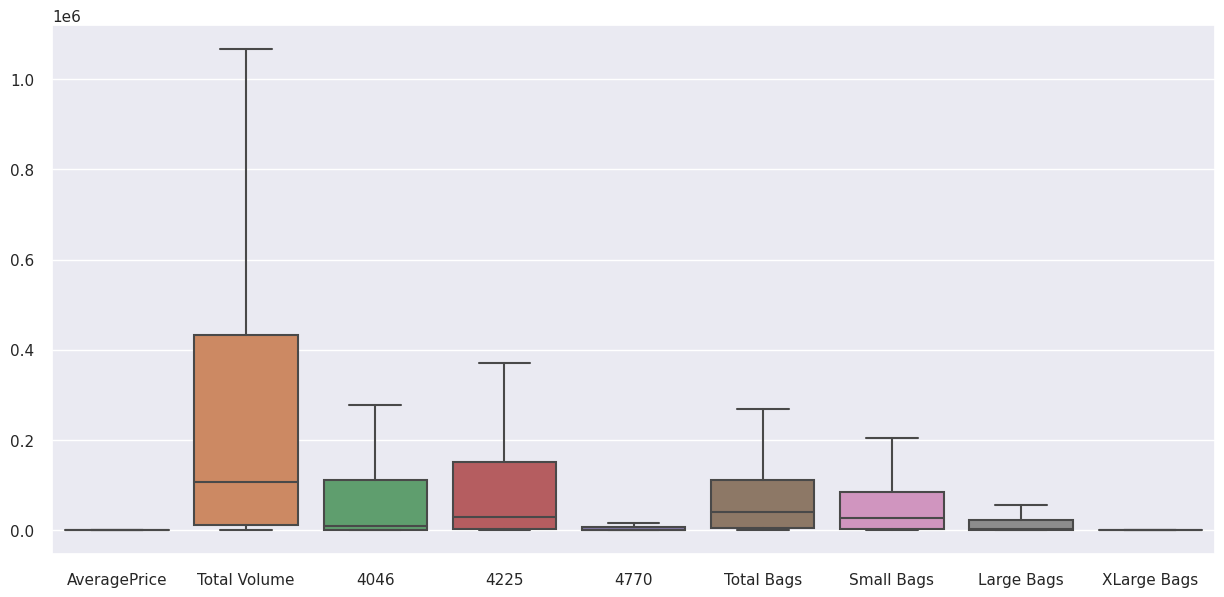

In [66]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = abacate[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

#Os dados estão livres de outliers.

##3.4 Variáveis Categóricas

Os dados contêm variáveis categóricas como "tipo", "mês" e "região", será aplicada a codificação one-hot em nossas variáveis "região", "mês" e também a codificação de rótulo na variável "tipo".

A codificação one-hot cria um número igual de colunas, com 1's e 0's, como o número de categorias em uma variável categórica. Uma coluna para uma categoria específica contém 1's onde a categoria está presente e 0's em outros lugares.

Quanto à codificação de rótulo, ela atribui um valor numérico às categorias de uma variável categórica em sua ordem alfabética, a indexação começa com 0.
 


In [67]:
abacate['region'] = pd.Categorical(abacate['region'])
dfDummies_region = pd.get_dummies(abacate['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
#Concatenar o DataFrame "dfDummies_region" com o DataFrame "abacate" 
abacate = pd.concat([abacate, dfDummies_region], axis=1)
#removendo a coluna "região" do DataFrame "abacate"
abacate.drop(columns="region",inplace=True)
abacate

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,1


In [69]:
#De maneira similar, aplicando a codificação one-hot nos meses.
abacate['Month'] = pd.Categorical(abacate['Month'])
dfDummies_month = pd.get_dummies(abacate['Month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#Concatenar o DataFrame "dfDummies_month" com o DataFrame "abacate" 
abacate = pd.concat([abacate, dfDummies_month], axis=1)
#removendo a coluna "Month" do DataFrame "abacate"
abacate.drop(columns="Month",inplace=True)
abacate

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Codificação label encoding é aplicada na variável "tipo".
label_encoder = preprocessing.LabelEncoder() 
abacate['type']= label_encoder.fit_transform(abacate['type']) 
abacate

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


#4. Ajuste do Modelo(Model Fitting)

In [72]:
abacate.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
#seleciona as colunas 1 a 77 do DataFrame abacate e atribui o resultado a X(variáveis independentes)
X=abacate.iloc[:,1:78]
y=abacate['AveragePrice']
#utilizando 80% do conjunto de dados para treinamento e 20% dos dados para teste
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
#converte a série y_test em um array numpy com tipo de dados float
y_test = np.array(y_test,dtype = float)


In [74]:
#Normalizando nosso X_train e X_test usando o escalonador padrão (standard scaler).
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [75]:
def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
'''A função "regression_results" definida acima calcula e imprime as seguintes características de um modelo: 
explained_variance, r2, adjusted_r2, MAE, MSE, RMSE. Ela aceita os valores originais e previstos como seus argumentos.'''

'A função "regression_results" definida acima calcula e imprime as seguintes características de um modelo: \nexplained_variance, r2, adjusted_r2, MAE, MSE, RMSE. Ela aceita os valores originais e previstos como seus argumentos.'

In [76]:
#Função para encontrar a precisão de cada modelo com base na validação cruzada K-fold.
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

#5. Multiple Linear Regression


In [77]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.6666
R2:  0.6665
Adjusted_r2:  0.6593
MAE:  0.1779
MSE:  0.0541
RMSE:  0.2327
Accuracy: 64.14 %
Standard Deviation: 1.49 %


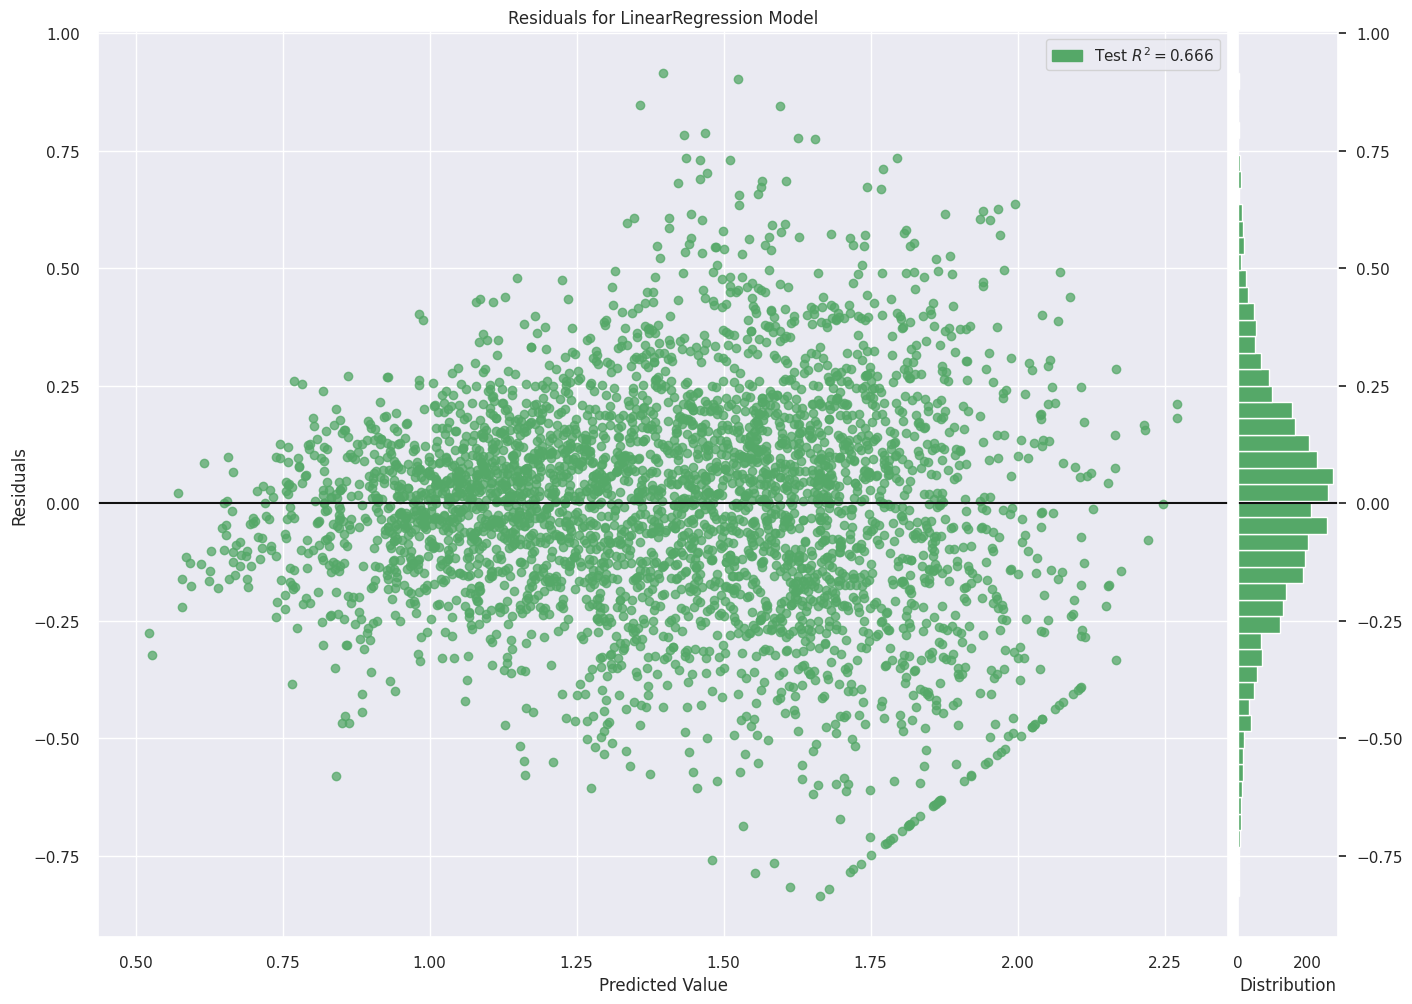

In [78]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#6. Random Forest Regression 


In [79]:
rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained_variance:  0.9053
R2:  0.9053
Adjusted_r2:  0.9033
MAE:  0.0893
MSE:  0.0154
RMSE:  0.124
Accuracy: 88.46 %
Standard Deviation: 0.51 %


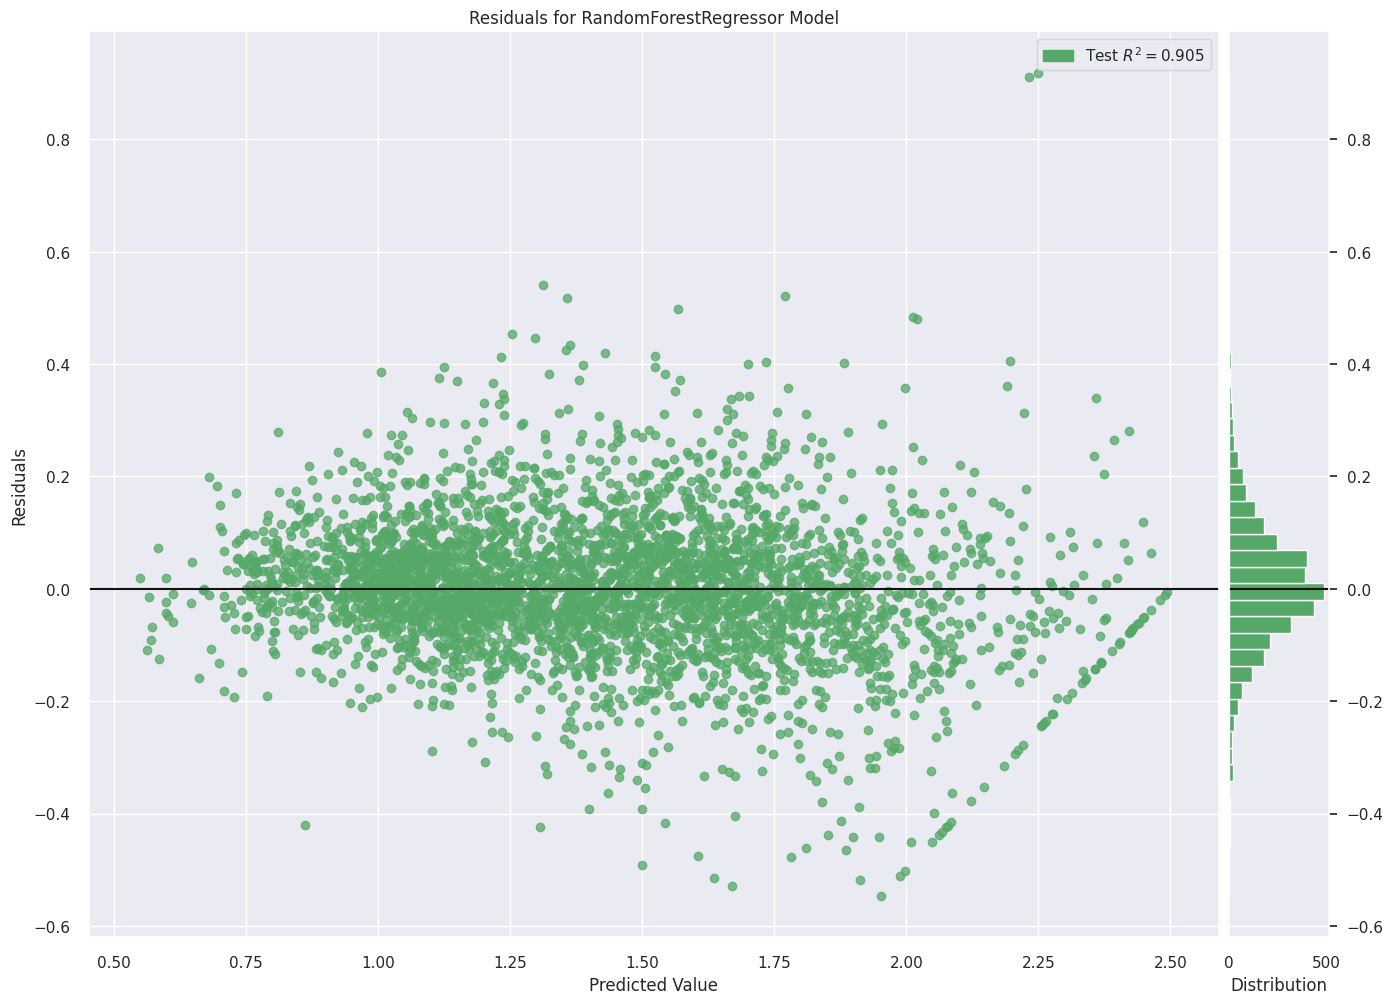

In [80]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(rand_regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

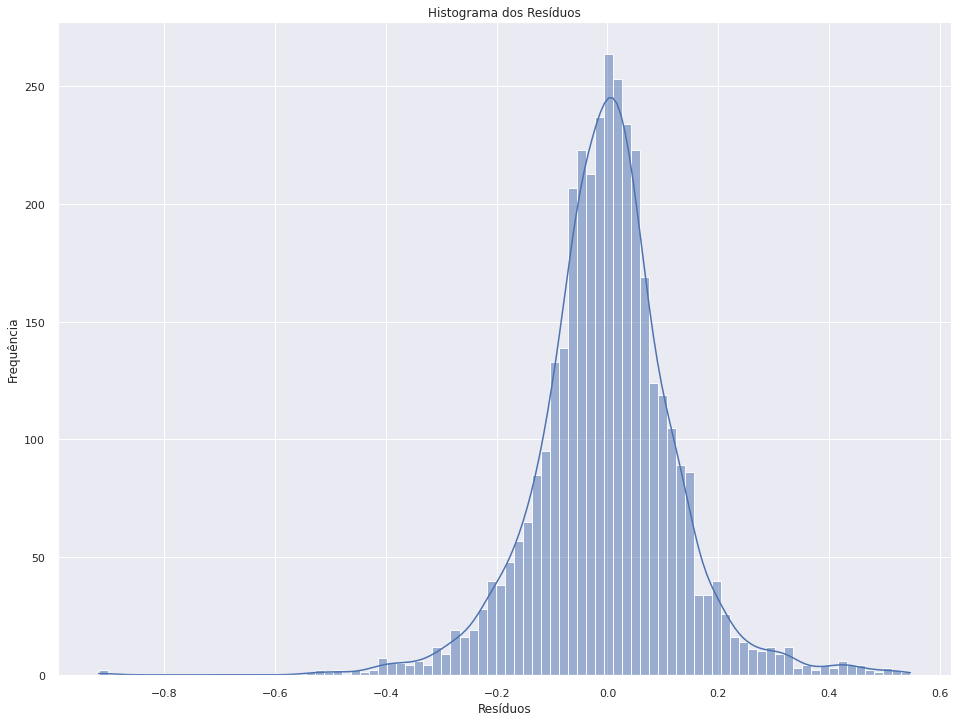

In [81]:
# Predições do modelo
y_pred = rand_regressor.predict(X_test).flatten()

# Gráfico de resíduos
residuals = y_test - y_pred
fig = plt.figure(figsize=(16, 12))
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

#7. XGBoost

In [82]:
xgb_regressor = XGBRegressor(objective='reg:squarederror')
xgb_regressor.fit(X_train, y_train)
y_pred_rf = xgb_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(xgb_regressor)

Explained_variance:  0.7514
R2:  0.7512
Adjusted_r2:  0.7459
MAE:  0.1549
MSE:  0.0404
RMSE:  0.2009
Accuracy: 72.24 %
Standard Deviation: 0.81 %


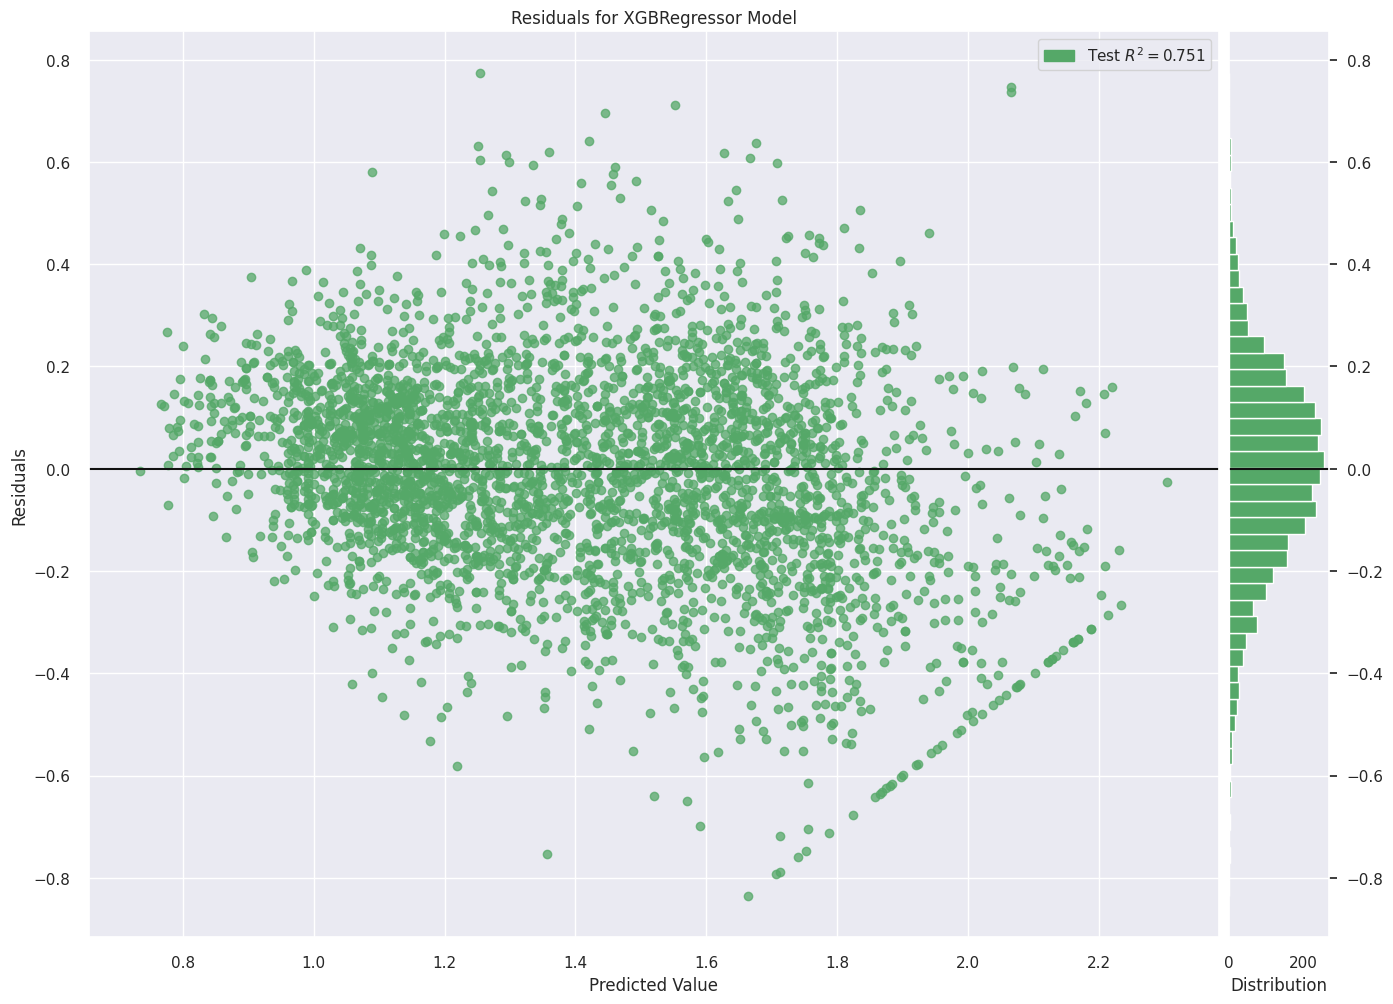

In [83]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(xgb_regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#8. Decision Tree Regression 

In [84]:
decision_tree=DecisionTreeRegressor(criterion='squared_error', splitter='random', random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.8232
R2:  0.8231
Adjusted_r2:  0.8193
MAE:  0.1114
MSE:  0.0287
RMSE:  0.1694
Accuracy: 80.62 %
Standard Deviation: 1.57 %


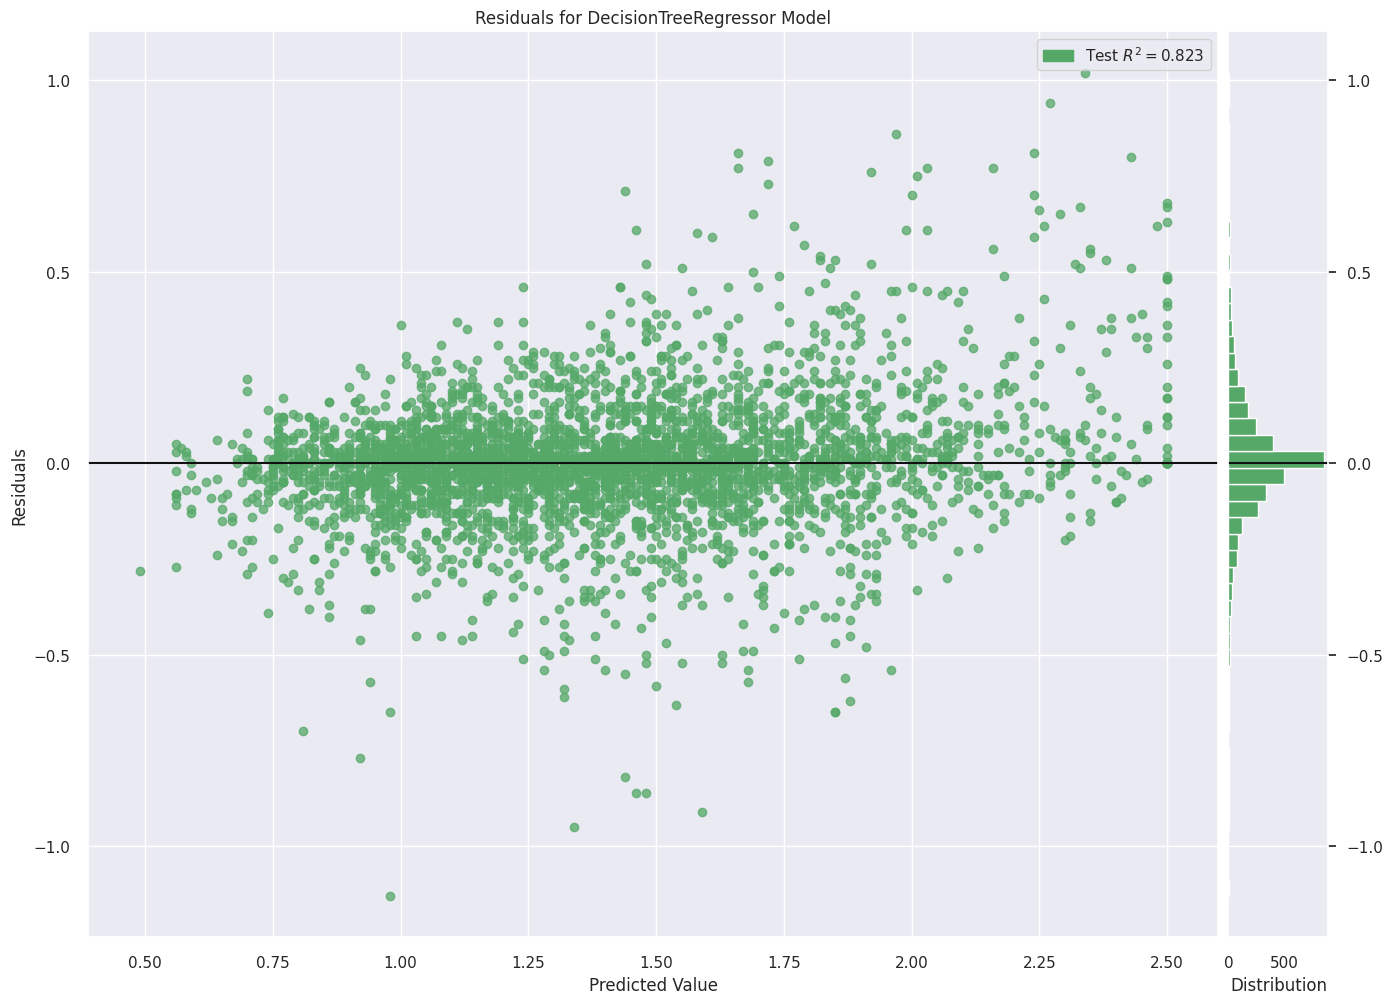

In [85]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(decision_tree, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#9. SVM (Support Vector Machine) 

In [86]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)
y_pred_svm = svm_regressor.predict(X_test)

In [87]:
# Calcule as métricas de desempenho para o svm
mse = mean_squared_error(y_test, y_pred_svm)
mape = mean_absolute_percentage_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)
mae = mean_absolute_error(y_test, y_pred_svm)

# Calcule o desvio padrão dos resíduos
residuos = y_test - y_pred_svm
#desvio_padrao = np.std(residuos*100)
media_pred = np.mean(y_pred_svm)
desvio_padrao = np.std(residuos)
desvio_percentual = desvio_padrao / media_pred * 100

# Imprima as métricas de desempenho
print("MSE:", mse)
print("MAPE:", mape)
print("R²:", r2)
print("MAE:", mae)
#print("Standard Deviation:", round(desvio_padrao, 2), "%")
print("Standard Deviation:", round(desvio_percentual, 2), "%")

MSE: 0.054826265476516485
MAPE: 0.12998692779579557
R²: 0.6622076744523999
MAE: 0.17638322339649345
Standard Deviation: 16.72 %


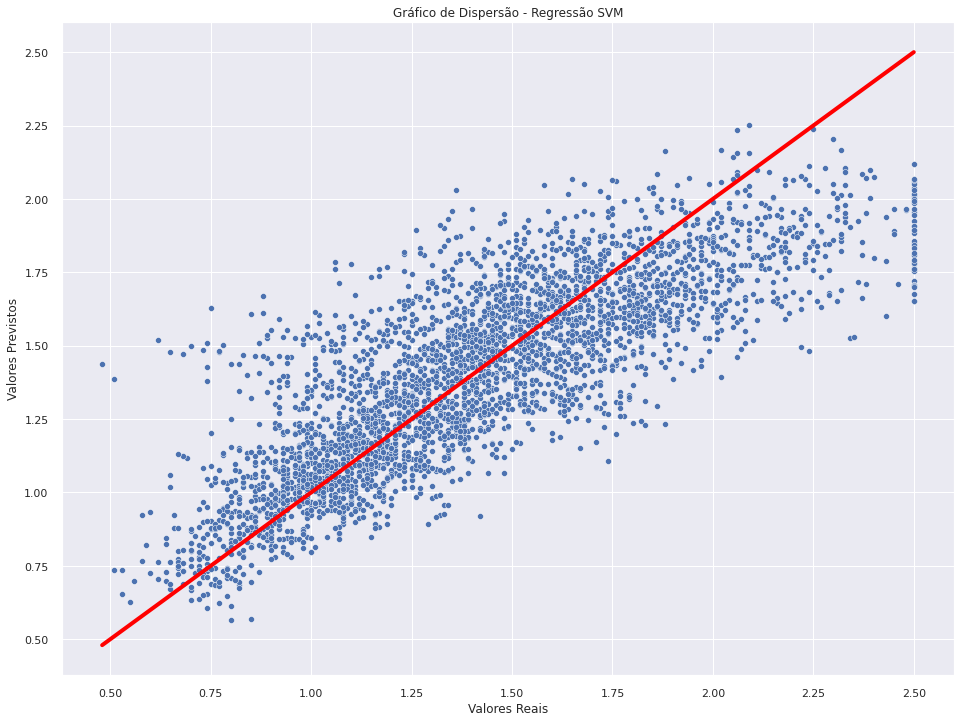

In [88]:
# Ajuste o tamanho da figura
sns.set(rc={"figure.figsize":(16, 12)})

# Crie um gráfico de dispersão
sns.scatterplot(x=y_test, y=y_pred_svm)

# Adicione um rótulo de eixo x
plt.xlabel("Valores Reais")

# Adicione um rótulo de eixo y
plt.ylabel("Valores Previstos")

# Adicione um título
plt.title("Gráfico de Dispersão - Regressão SVM")

# Adicione uma linha diagonal para mostrar onde os valores reais e previstos deveriam estar se fossem perfeitamente iguais
sns.lineplot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=4)

# Exiba o gráfico
plt.show()

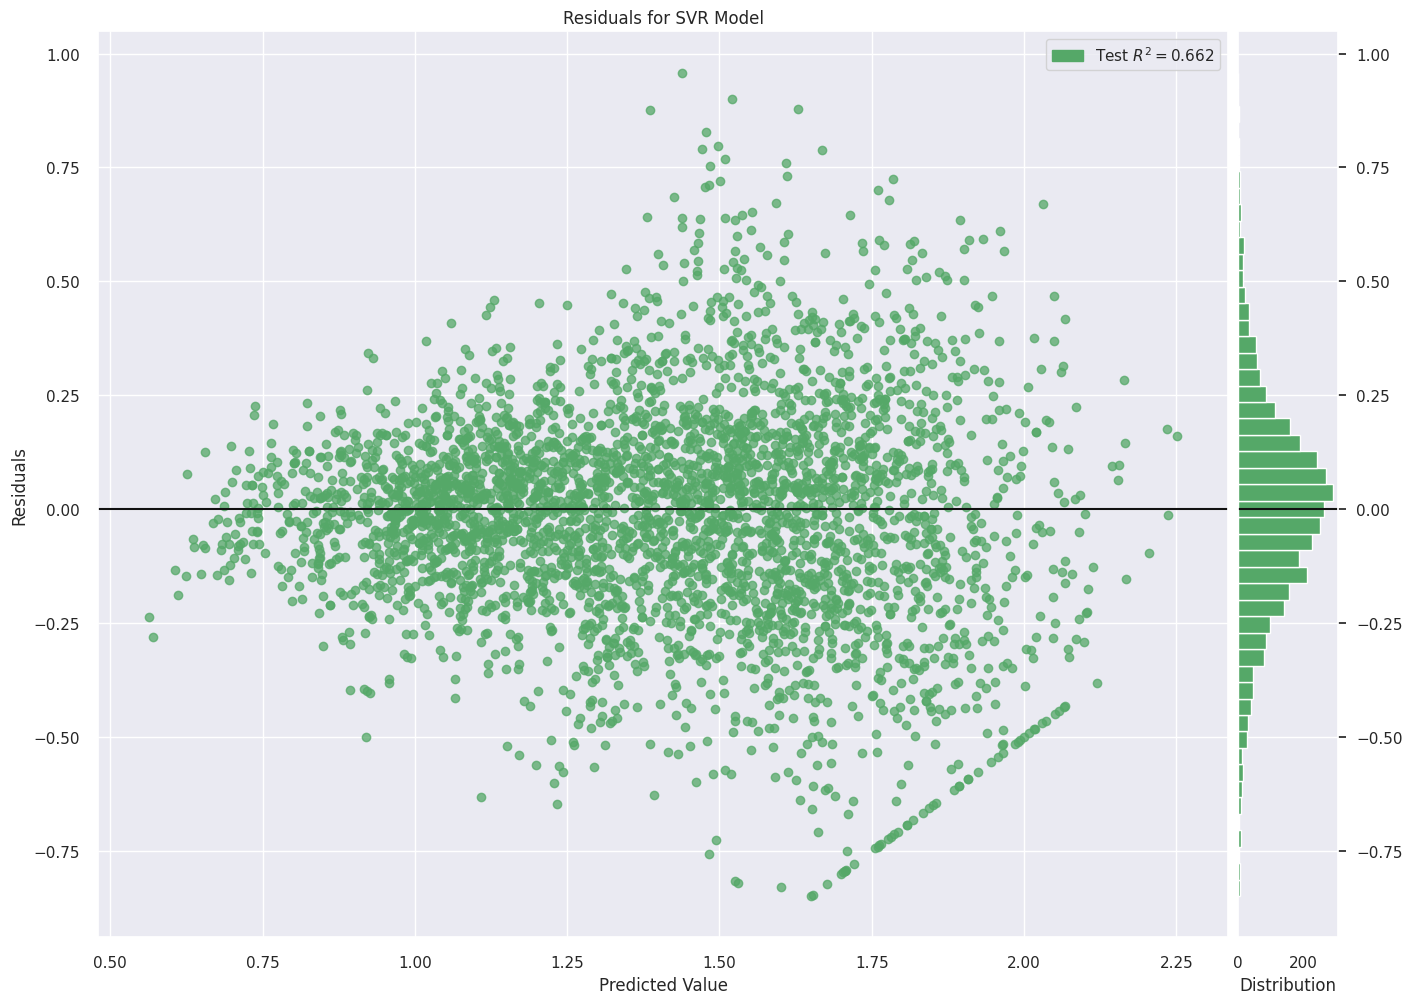

In [89]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(svm_regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#10. RNA (Rede Neural Artificial)

In [90]:
#Definição da estrutura da RNA
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

#imprime informações sobre o modelo
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4992      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Compilação da RNA
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae", "mse", "mape"])

# Treinamento da RNA
result = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
457/457 [==============================] - 3s 3ms/step - loss: 0.1446 - mae: 0.2649 - mse: 0.1446 - mape: 19.9718 - val_loss: 0.0601 - val_mae: 0.1910 - val_mse: 0.0601 - val_mape: 14.6144
Epoch 2/100
457/457 [==============================] - 1s 3ms/step - loss: 0.0504 - mae: 0.1738 - mse: 0.0504 - mape: 13.0350 - val_loss: 0.0483 - val_mae: 0.1685 - val_mse: 0.0483 - val_mape: 12.7325
Epoch 3/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0424 - mae: 0.1575 - mse: 0.0424 - mape: 11.7876 - val_loss: 0.0424 - val_mae: 0.1560 - val_mse: 0.0424 - val_mape: 11.6679
Epoch 4/100
457/457 [==============================] - 1s 3ms/step - loss: 0.0384 - mae: 0.1488 - mse: 0.0384 - mape: 11.1163 - val_loss: 0.0386 - val_mae: 0.1480 - val_mse: 0.0386 - val_mape: 11.1425
Epoch 5/100
457/457 [==============================] - 1s 3ms/step - loss: 0.0350 - mae: 0.1416 - mse: 0.0350 - mape: 10.5225 - val_loss: 0.0370 - val_mae: 0.1452 - val_mse: 0.0370 - val_mape: 10.

In [92]:
# Avaliação do modelo no conjunto de teste
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# R2 ajustado
n = X_train.shape[0] # número de amostras de treinamento
k = X_train.shape[1] # número de recursos usados na modelagem
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print('R2 score:', r2)
print('Adjusted R2 score:', adj_r2)

115/115 [==============================] - 0s 2ms/step
R2 score: 0.8946956192964794
Adjusted R2 score: 0.8941372254314446


115/115 [==============================] - 0s 2ms/step


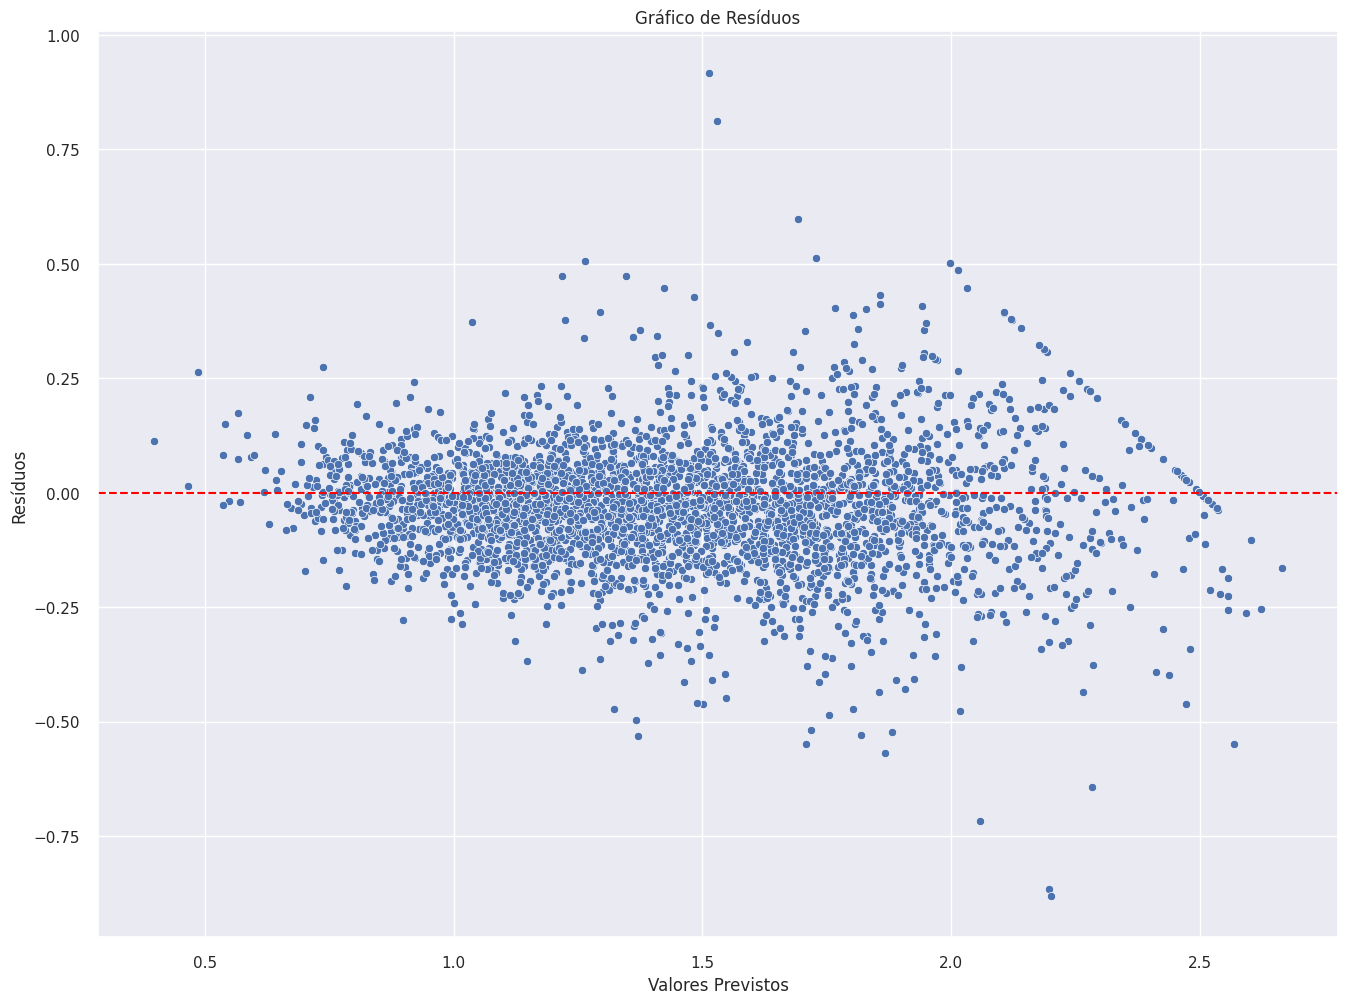

In [93]:
# Predições do modelo
y_pred = model.predict(X_test).flatten()

# Gráfico de resíduos
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(16, 12), dpi=100)
sns.scatterplot(x=y_pred, y=residuals, ax=ax)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Valores Previstos')
ax.set_ylabel('Resíduos')
ax.set_title('Gráfico de Resíduos')
plt.show()

115/115 [==============================] - 0s 2ms/step


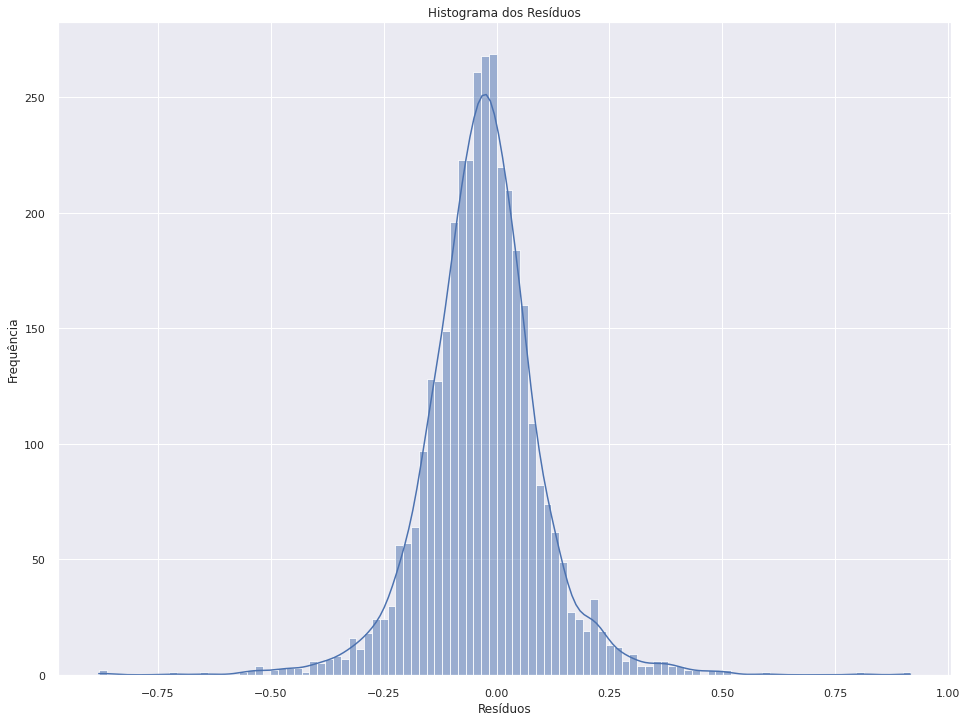

Standard Deviation: 12.71 %


In [94]:
# Predições do modelo
y_pred = model.predict(X_test).flatten()

# Gráfico de resíduos
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

desvio_padrao = np.std(residuals*100)
print("Standard Deviation:", round(desvio_padrao, 2), "%")

#11. Avaliação Final do Modelo

Random Forest->RNA->Decision Tree->XGB->Linear Regression->SVM

In [96]:
# Criando o DataFrame com as métricas
metrics_model1 = {'MSE': 0.0541, 'MAE': 0.1779, 'R²': 0.6665, 'Standard Deviation': 1.49}
metrics_model2 = {'MSE': 0.0171, 'MAE': 0.0949 , 'R²': 0.8946, 'Standard Deviation': 12.71}
metrics_model3 = {'MSE': 0.0548, 'MAE': 0.1763, 'R²': 0.6622, 'Standard Deviation': 16.72}
metrics_model4 = {'MSE': 0.0287, 'MAE': 0.1114, 'R²': 0.8231, 'Standard Deviation': 1.57}
metrics_model5 = {'MSE': 0.0404, 'MAE': 0.1549, 'R²': 0.7512, 'Standard Deviation': 0.81}
metrics_model6 = {'MSE': 0.0154, 'MAE': 0.0893, 'R²': 0.9053, 'Standard Deviation': 0.51}
df_metrics = pd.DataFrame([metrics_model1, metrics_model2, metrics_model3, metrics_model4, metrics_model5, metrics_model6], index=['Multiple Linear Regression', 'RNA', 'SVM', 'Decision Tree Regression', 'XGBoost', 'Random Forest'])

# Criando o Styler e aplicando estilos e cores
styler = df_metrics.style.background_gradient(cmap='coolwarm')   
styler.set_properties(**{'text-align': 'center'})
styler.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#DA70D6')]}])
styler.set_caption('Comparação dos modelos')


,MSE,MAE,R²,Standard Deviation
Multiple Linear Regression,0.054100,0.177900,0.666500,1.490000
RNA,0.017100,0.094900,0.894600,12.710000
SVM,0.054800,0.176300,0.662200,16.720000
Decision Tree Regression,0.028700,0.111400,0.823100,1.570000
XGBoost,0.040400,0.154900,0.751200,0.810000
Random Forest,0.015400,0.089300,0.905300,0.510000
